# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.groupby('color').describe()

carat                                                    clarity  \
         count      mean       std   min   25%   50%   75%   max    count   
color                                                                       
0       2808.0  1.162137  0.595801  0.23  0.71  1.11  1.52  5.01   2808.0   
1       5422.0  1.026927  0.579173  0.23  0.52  1.00  1.50  4.01   5422.0   
2       8302.0  0.911627  0.521090  0.23  0.41  0.90  1.20  4.13   8302.0   
3      11290.0  0.771088  0.441399  0.23  0.39  0.70  1.04  3.01  11290.0   
4       9539.0  0.736509  0.397636  0.20  0.40  0.70  1.01  3.01   9539.0   
5       9797.0  0.657867  0.368566  0.20  0.36  0.53  0.90  3.05   9797.0   
6       6774.0  0.657715  0.359540  0.20  0.36  0.53  0.90  3.40   6774.0   

                 ...         y                   z                      \
           mean  ...       75%        max    count      mean       std   
color            ...                                                     
0      2.767450  ...  4.574327   6.969200   2808.0  4.032665  0.741059   
1      2.909627  ...  4.457610   6.314175   5422.0  3.846801  0.768017   
2      2.907733  ...  4.209180  19.728555   8302.0  3.700416  0.756337   
3      3.482462  ...  4.031250   5.662250  11290.0  3.507515  0.667897   
4      3.192578  ...  3.977403   5.713070   9539.0  3.466212  0.620991   
5      3.052669  ...  3.828335  11.417550   9797.0  3.338662  0.598338   
6      2.776794  ...  3.837380   6.265840   6774.0  3.343160  0.576937   

                                                          
            min       25%       50%       75%        max  
color                                                     
0      2.458620  3.528179  4.109673  4.574327   6.969200  
1      2.398825  3.182625  3.929850  4.457610   6.314175  
2      2.379840  2.968855  3.819220  4.209180  19.728555  
3      2.340730  2.881660  3.481360  4.031250   5.662250  
4      2.320160  2.917885  3.478110  3.977403   5.713070  
5      2.239050  2.811440  3.220135  3.828335  11.417550  
6      2.290125  2.819774  3.220770  3.837380   6.265840  

[7 rows x 64 columns]

In [4]:
#your comments here
# The diamonds have an average of around 0.9 to 1.16 carats.
# The min and max values for carat are 0.20 and 5.01 respectively, indicating that there is a wide range of carat weights.
# The mean depth of the diamonds ranges from 3.50 to 3.84. The range is smaller than the carats.
# The price of the diamonds has a mean value ranging from $1,155 to $5,310.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
# your hypotheses here
# Carats since the bigger the diamond, the more expensive it usually is;
# And the color, since some colors are rarer than others and that makes them more valuable.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
#your code here
diamonds.groupby('color').mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.767450,61.887215,57.812393,5323.818020,6.519338,4.032665,4.032665
1,1.026927,2.909627,61.846385,57.577278,5091.874954,6.222826,3.846801,3.846801
2,0.911627,2.907733,61.836557,57.518176,4484.958805,5.984776,3.700416,3.700416
3,0.771088,3.482462,61.757449,57.288060,3998.145173,5.678549,3.507515,3.507515
4,0.736509,3.192578,61.694087,57.433148,3725.091938,5.616727,3.466212,3.466212
5,0.657867,3.052669,61.662090,57.491201,3076.752475,5.411580,3.338662,3.338662
6,0.657715,2.776794,61.698066,57.404355,3168.106436,5.417851,3.343160,3.343160


**What do you see? Pay special attention to the relationship between price and color.**

In [7]:
#your thoughts here
# As the color number increases, the mean price decreases. 
# High color number == Lower color grade == Less valuable

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

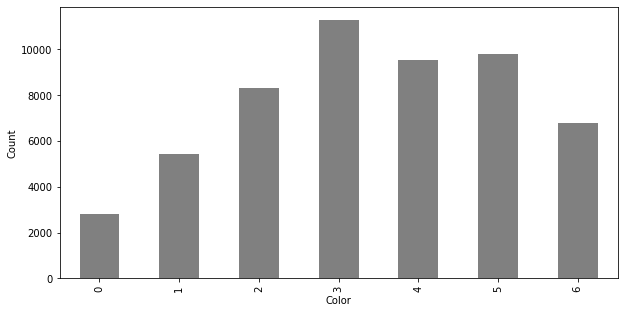

In [8]:
#your code here
plt.figure(figsize=(10,5))
diamonds['color'].value_counts().sort_index().plot(kind='bar', color = "grey")
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

In [9]:
diamonds['color'].value_counts()

3    11290
5     9797
4     9539
2     8302
6     6774
1     5422
0     2808
Name: color, dtype: int64

In [10]:
#your comments here
# The majority of the diamonds have a color between 3 and 6, with the most frequent rating being 3.
# The diamonds' colors 0, 1 and 2 are more rare, therefore less bought because they're more expensive.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [11]:
#your code here
diamonds.groupby('carat').mean()

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,3.833333,61.100000,59.333333,365.166667,3.786667,2.303021,2.303021
0.21,5.444444,3.444444,60.511111,58.444444,380.222222,3.874444,2.332788,2.332788
0.22,4.800000,2.800000,61.620000,60.400000,391.400000,3.898000,2.386137,2.386137
0.23,4.518771,5.078498,61.426621,58.034130,486.143345,3.946382,2.431810,2.431810
0.24,4.185039,4.988189,61.599213,57.488189,505.185039,3.990157,2.466390,2.466390
...,...,...,...,...,...,...,...,...
4.00,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,6.314175,6.314175
4.01,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,6.205350,6.205350
4.13,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,6.431400,6.431400


In [12]:
#your comments
# As the weight increases, so does the price, x, y and z dimensions. 
# This shows that heavier diamonds tend to be of higher quality and therefore more expensive.


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

<AxesSubplot: ylabel='Frequency'>

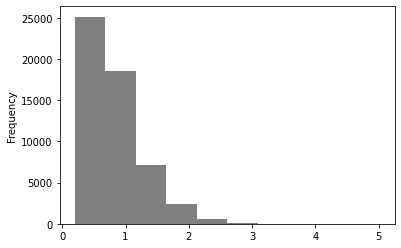

In [13]:
#your code here
diamonds['carat'].plot.hist(color = "grey")

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [14]:
#your code here
diamonds.groupby('table').mean()

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,3.00,62.90,4997.0,6.450,4.044470,4.044470
44.0,0.2900,5.0,3.00,62.80,474.0,4.200,2.650160,2.650160
49.0,0.6500,3.0,2.00,64.25,2290.5,5.355,3.426663,3.426663
50.0,1.5100,3.0,1.00,61.50,8995.5,7.380,4.510200,4.510200
50.1,0.9400,2.0,2.00,66.00,3353.0,6.130,4.059000,4.059000
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,1.00,58.00,1633.0,5.850,3.349500,3.349500
73.0,0.6025,4.5,3.75,68.90,2406.5,5.520,3.751165,3.751165
76.0,0.7900,3.0,1.00,65.30,2362.0,5.520,3.477225,3.477225


In [15]:
#your comments here
# As the value of table increases, the mean price of diamonds and the carat weight also increase.

**Finally, do the same with the `clarity` column.**

In [16]:
#your code here
diamonds.groupby('clarity').mean()

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,4.223634,4.223634
1,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,3.640928,3.640928
2,1.077602,3.469967,61.771567,57.926823,5062.267356,6.404157,3.953282,3.953282
3,0.727108,3.161812,61.667968,57.313966,3839.144308,5.572860,3.439044,3.439044
4,0.763850,3.494370,61.724249,57.418040,3924.166204,5.658633,3.492574,3.492574
5,0.503131,3.350848,61.624521,56.883881,2519.512315,4.961721,3.061861,3.061861
6,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,3.221723,3.221723
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,3.062041,3.062041


In [17]:
#your comments here
# As the clarity value increases, the mean price, mean depth and mean table decrease.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [18]:
#your thoughts here

# The hypothesis regarding the carats is confirmed, as diamonds with larger carats have a higher average price.
# However, the hypothesis regarding color is not as accurate, as the color had less of an impact on the price compared to carat and 
# factors such as clarity, table and depth.

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


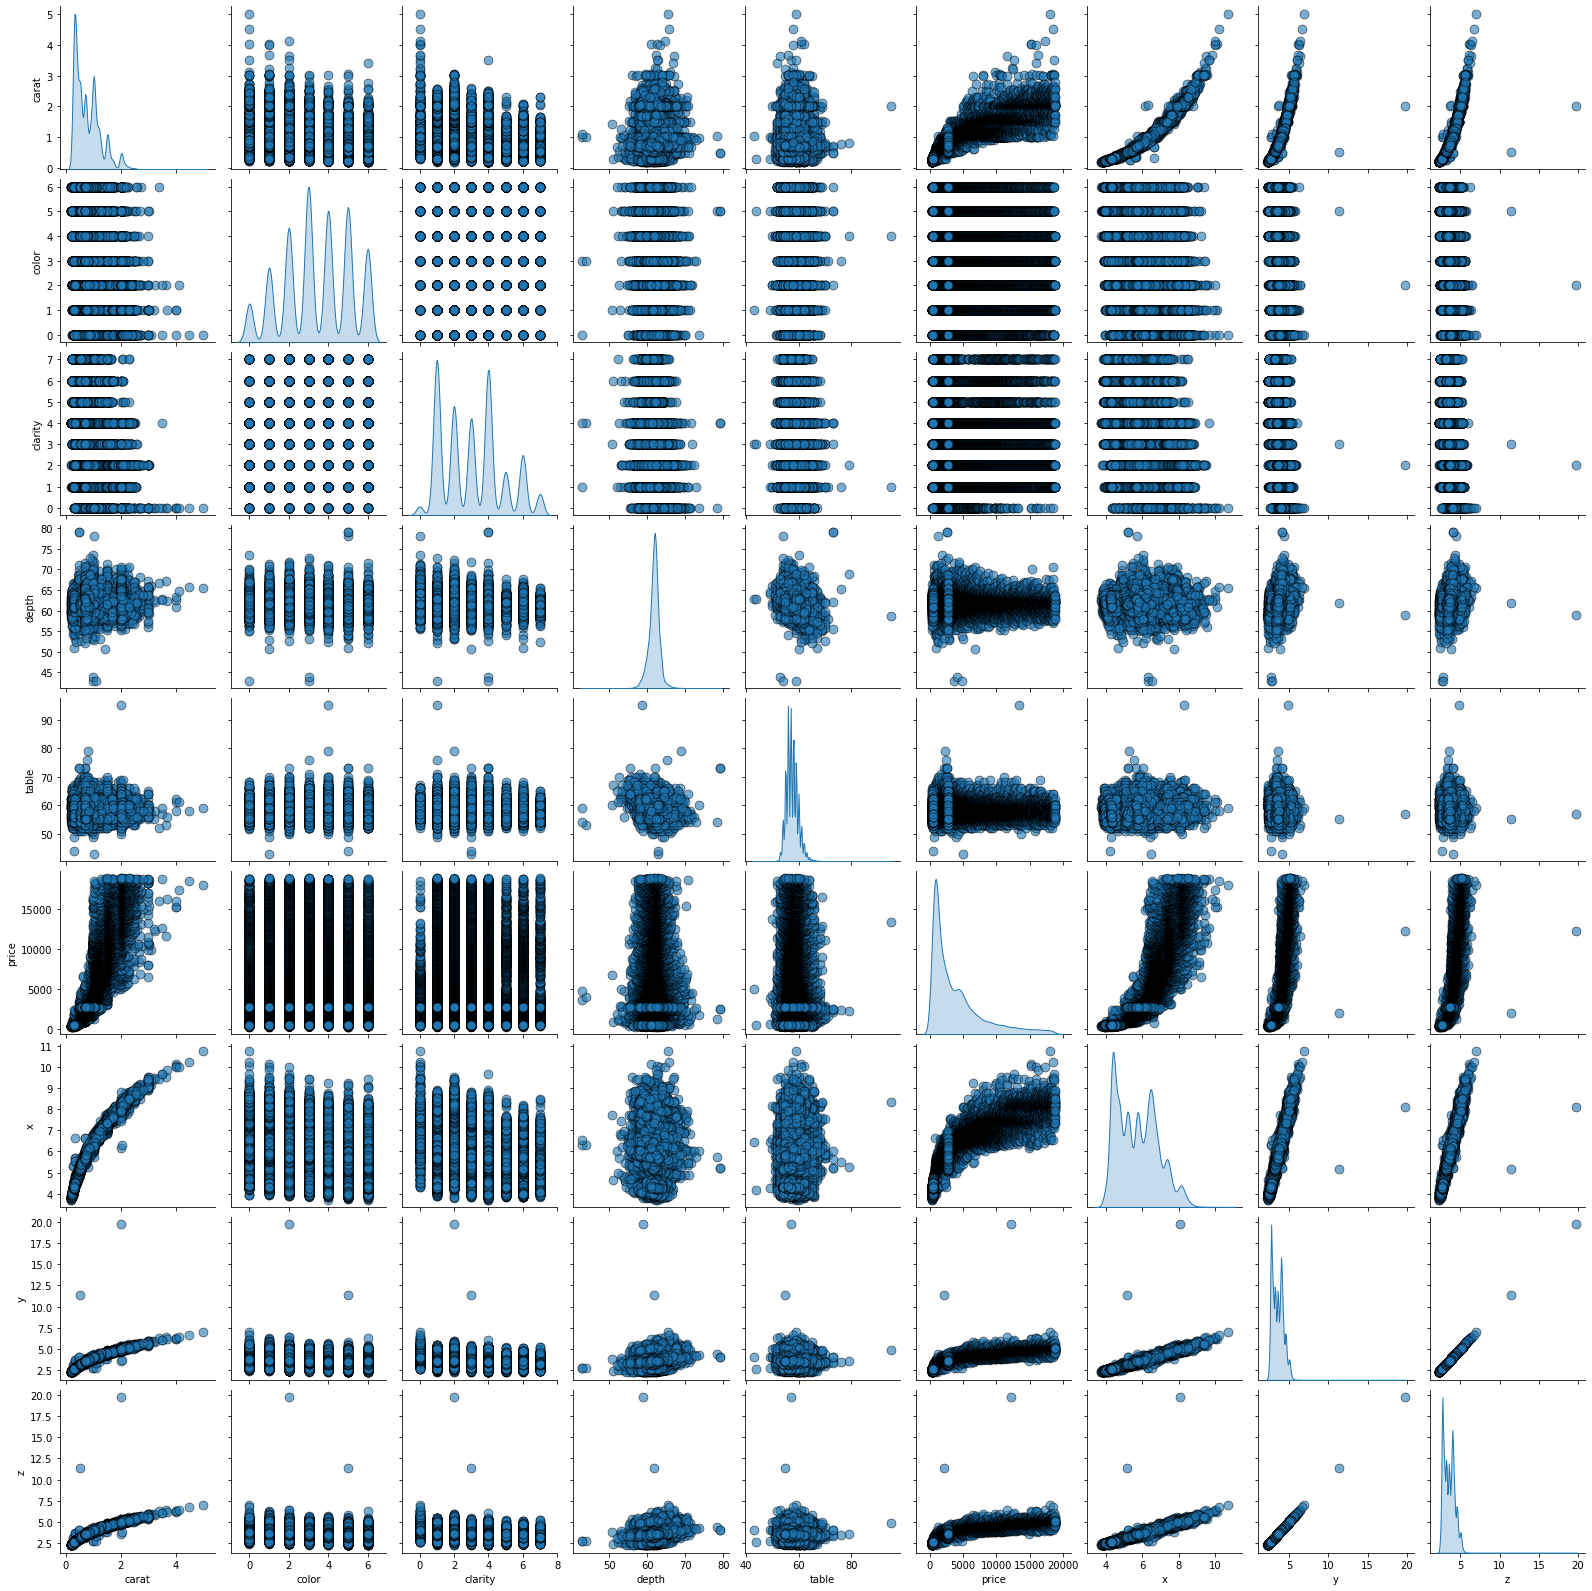

In [19]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [20]:
#your thoughts here
# Price vs X, Y, Z
# Carat vs X, Y, Z

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

In [21]:
# your code here
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,2,61.5,55.0,326,3.95,2.438475,2.438475
1,0.21,Premium,5,1,59.8,61.0,326,3.89,2.311270,2.311270
2,0.23,Good,5,3,56.9,65.0,327,4.05,2.310140,2.310140
3,0.29,Premium,1,4,62.4,58.0,334,4.20,2.630160,2.630160
4,0.31,Good,0,2,63.3,58.0,335,4.34,2.750385,2.750385


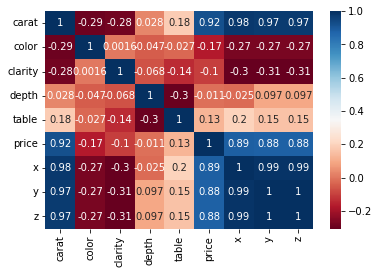

In [29]:
corr = diamonds.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

**What do you see here? Regarding the results before, does it fit with them?**

In [22]:
#your thoughts here
# The values of 0.88, 0.92, 0.97, 0.98, and 0.99 are close to 1, indicating a strong positive correlation between the variables. 
# The negative values close to 0, however, show us that there's a strong negative correlation between the variables. In this case, if one variable
# goes up, the other goes down.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

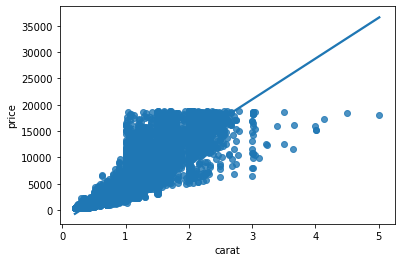

In [46]:
# your code here
from scipy import stats
sns.regplot(x="carat", y="price", data=diamonds)
plt.show()

In [48]:
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds["carat"], diamonds["price"])
print("Slope: ", slope)      # the average change in the price of a diamond for every unit increase in its weigh
print("Intercept: ", intercept) #  the average price of a diamond with a weight of zero
print("R-value: ", r_value)  # correlation
print("P-value: ", p_value)  # the probability that the observed correlation between the two variables could have occurred by chance
print("Standard Error: ", std_err) # how much the estimated regression line deviates from the actual values of the dependent variable 

Slope:  7755.632924871648
Intercept:  -2255.923406988887
R-value:  0.9216104923341861
P-value:  0.0
Standard Error:  14.06424017321538


**What do you think?**

In [49]:
#your thoughts here

# OVERALL
# These results suggest that there is a strong positive correlation between the price and carat variables, meaning that as the carats of a 
# diamond increases, its price is also expected to increase. The relatively small standard error indicates that the regression line is a good 
# fit to the data, and the low P-value indicates that the correlation is statistically significant and not due to random chance.

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [25]:
#your thoughts here
# I could repeat plotting a scatter plot and calculating the linear regression between the price variable and each of the other features 
# in the dataset to see their correlation.

# Regarding the carat feature, it's known that carat weight is one of the most important factors affecting the price of a diamond and I believe
# this analysis just proved that it's true.

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.